In [84]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

## Processamento das Categorias

Com o filtro dos alunos e os perfis montados, este notebook tem como objetivo remover alunos que não tiveram presença válida no ENADE, e transformar as variáveis categóricas.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
computacaoenade2021 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2021/computacao_enade_2021.csv', sep=';')
computacaoenade2017 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2017/computacao_enade_2017.csv', sep=';')
computacaoenade2014 = pd.read_csv('/content/drive/MyDrive/EDM 2025.1/DATASETS/ENADE/2014/computacao_enade_2014.csv', sep=';')

Durante o processamento, não verifiquei desse total de alunos, qual era a quantidade que possuiam resultados válidos, isto é: O atributo **TP_PRES** = 555 (Presente com resultado válido)

In [5]:
computacaoenade2021.shape

(7564, 28)

In [6]:
computacaoenade2021['TP_PRES'].value_counts()

,count
TP_PRES,
555,5651
222,1882
334,23
444,8


In [7]:
computacaoenade2017.shape

(7129, 28)

In [8]:
computacaoenade2017['TP_PRES'].value_counts()

,count
TP_PRES,
555,5675
222,1446
444,8


In [9]:
computacaoenade2014.shape

(8285, 30)

In [10]:
computacaoenade2014['TP_PRES'].value_counts()

,count
TP_PRES,
555,6669
222,1616


In [31]:
computacaoenade2021 = computacaoenade2021[computacaoenade2021['TP_PRES'] == 555]
computacaoenade2017 = computacaoenade2017[computacaoenade2017['TP_PRES'] == 555]
computacaoenade2014 = computacaoenade2014[computacaoenade2014['TP_PRES'] == 555]

In [12]:
print(computacaoenade2021.shape)
print(computacaoenade2017.shape)
print(computacaoenade2014.shape) #2014 tem dois a mais que são referentes aos turnos.

(5651, 28)
(5675, 28)
(6669, 30)


## Questão de Cursos Integrais no ENADE 2014

O de 2014 possui três colunas para descrever o turno da graduação. Nos ciclos seguintes, todos os turnos foram consolidados em uma única coluna. Então para isso, será necessário fazer uma consolidação.

In [13]:
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'IN_MATUT', 'IN_VESPER', 'IN_NOTURNO',
       'TP_PRES', 'NT_GER', 'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD',
       'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09',
       'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [14]:
computacaoenade2014['IN_MATUT'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_MATUT,
0.0,4213
1.0,2455


In [15]:
computacaoenade2014['IN_VESPER'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_VESPER,
0.0,4851
1.0,1817


In [16]:
computacaoenade2014['IN_NOTURNO'].value_counts()
# 0: NÃO
# 1: SIM

,count
IN_NOTURNO,
1.0,4080
0.0,2588


In [17]:
turnos = computacaoenade2014[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']]
multiplos_turnos = turnos.sum(axis=1)

quantidade_multiplos = (multiplos_turnos >= 2).sum()
print(f"Linhas com 2 ou mais turnos marcados como 'SIM': {quantidade_multiplos}")

turno_unico = computacaoenade2014[multiplos_turnos == 1]
print(f"Linhas com apenas um turno marcado como 'SIM': {len(turno_unico)}")

Linhas com 2 ou mais turnos marcados como 'SIM': 1382
Linhas com apenas um turno marcado como 'SIM': 5286


In [18]:
cursos_multiplos_turnos = computacaoenade2014[multiplos_turnos >= 2]
cursos_multiplos_turnos[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']].head()

,IN_MATUT,IN_VESPER,IN_NOTURNO
56,1.0,1.0,0.0
57,1.0,1.0,0.0
58,1.0,1.0,0.0
59,1.0,1.0,0.0
60,1.0,1.0,0.0


2455+1817+4080 = 8355
Possui 1683 cursos que são do tipo Integral, mas que não estão consolidados aqui de forma eficiente.

In [19]:
computacaoenade2017.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [20]:
computacaoenade2017['CO_TURNO_GRADUACAO'].value_counts()
#1 = Matutino
#2 = Vespertino
#3 = Integral
#4 = Noturno

,count
CO_TURNO_GRADUACAO,
4.0,3222
3.0,1090
1.0,958
2.0,402


### Padronização do ENADE 2014 [turnos]

In [21]:
turnos = computacaoenade2014[['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO']]
soma_turnos = turnos.sum(axis=1)

computacaoenade2014['CO_TURNO_GRADUACAO'] = np.nan

computacaoenade2014.loc[soma_turnos >= 2, 'CO_TURNO_GRADUACAO'] = 3 #integral
computacaoenade2014.loc[(computacaoenade2014['IN_MATUT'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 1 #matutino
computacaoenade2014.loc[(computacaoenade2014['IN_VESPER'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 2 #vespertino
computacaoenade2014.loc[(computacaoenade2014['IN_NOTURNO'] == 1) & (soma_turnos == 1), 'CO_TURNO_GRADUACAO'] = 4 #noturno


In [22]:
computacaoenade2014['CO_TURNO_GRADUACAO'].value_counts()
#somou certo, então tá tudo ok

,count
CO_TURNO_GRADUACAO,
4.0,3752
3.0,1382
1.0,1098
2.0,436


In [23]:
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'IN_MATUT', 'IN_VESPER', 'IN_NOTURNO',
       'TP_PRES', 'NT_GER', 'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD',
       'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09',
       'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21',
       'CO_TURNO_GRADUACAO'],
      dtype='object')

In [24]:
computacaoenade2014 = computacaoenade2014.drop(columns=['IN_MATUT', 'IN_VESPER', 'IN_NOTURNO'])

In [25]:
computacaoenade2017.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

In [26]:
colunas_2017 = computacaoenade2017.columns.tolist()
colunas_reordenadas = [col for col in colunas_2017 if col in computacaoenade2014.columns]
computacaoenade2014 = computacaoenade2014[colunas_reordenadas]
computacaoenade2014.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'],
      dtype='object')

## Seleção de atributos para normalização (relevantes).



*   **NU_ANO**: só informa o ano da edição;
*   **CO_CURSO**: não traz informação semântica
*   **CO_GRUPO**
*   **CO_UF_CURSO**: utilizar pra explicar os cluters







---



Para algumas variáveis, vou fazer um mapeamento para reduzir a granularidade.

QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'

In [34]:
co_grupo_dict = {
    72 : 'ADS',
    79 : 'TRC',
    4004 : 'BCC',
    4005 : 'LCBCC',
    4006 : 'BSI',
    6409 : 'GTI',
    5809 : 'EC'
}

co_categad_dict = {
    1 : 'Pública Federal',
    2 : 'Pública Estadual',
    3 : 'Pública Municipal',
    4 : 'Privada CFL',
    5 : 'Privada SFL',
    7 : 'Pública Municipal'
}

ufs_dict = {
    21 : 'MA',
    22 : 'PI',23 : 'CE',
    24 : 'RN',25 : 'PB',
    26 : 'PE',27 : 'AL',
    28 : 'SE',29 : 'BA'
}

q1_estado_civil_dict = {
    'A': 'Solteiro',
    'B': 'Casado',
    'C': 'Separado',
    'D': 'Viúvo',
    'E': 'Outro'
}

q2_raca_dict = {
    'A' : 'Branca',
    'B' : 'Preta',
    'C' : 'Amarela',
    'D' : 'Parda',
    'E': 'Indígena',
    'F': 'Não declarado'
}

q3_nacio_dict = {
    'A' : 'Brasileira',
    'B' : 'Brasileira naturalizada',
    'C' : 'Estrangeira'
}

q4_q5_escolaridade_pais_dict = {
    'A' : 'Nenhuma',
    'B' : 'Fundamental I',
    'C' : 'Fundamental II',
    'D' : 'Ensino Médio',
    'E': 'Superior',
    'F': 'Pós-graduação'
}

q8_renda_total_dict = {
    'A' : 'Até 1,5 Salário Mínimo',
    'B' : 'De 1,5 a 3 Salários Mínimos',
    'C' : 'De 3 a 4,5 Salários Mínimos',
    'D' : 'De 4,5 a 6 Salário Mínimos',
    'E': 'De 6 a 10 Salário Mínimos',
    'F': 'De 10 a 30 Salário Mínimos',
    'G': 'Acima de 30 Salário Mínimos'
}

q9_situacao_financeira_dict = {
    'A' : 'Sem renda/Outros',
    'B' : 'Sem renda/Outros',
    'C' : 'Possui renda/Outros',
    'D' : 'Possui renda',
    'E': 'Possui renda/Sustento',
    'F': 'Possui renda/principal'
}

q10_situacao_trab_dict = {
    'A' : 'Não trabalha',
    'B' : 'Trabalha eventualmente',
    'C' : 'Trabalho até 20h semanais',
    'D' : 'Trabalho 21h/39h semanais',
    'E': 'Trabalho 40h +'
}

q11_bolsa_dict = {
    'A' : 'Não se aplica','B' : 'Não',
    'C' : 'Sim', 'D' : 'Sim',
    'E': 'Sim', 'F' : 'Sim',
    'G' : 'Sim', 'H' : 'Sim',
    'I': 'Sim', 'J' : 'Sim',
    'K' : 'Sim'
}

q12_auxilo_dict = {
    'A' : 'Nenhum',
    'B' : 'Moradia',
    'C' : 'Alimentação',
    'D' : 'Moradia e Alimentação',
    'E': 'Permanência',
    'F' : 'Outro'
}

q14_bolsa_acad_dict = {
    'A' : 'Nenhum',
    'B' : 'IC',
    'C' : 'Extensão',
    'D' : 'Monitoria/Tutoria',
    'E': 'PET',
    'F' : 'Outro'
}

q15_af_dict = {
    'A' : 'Não',
    'B' : 'IC',
    'C' : 'Extensão',
    'D' : 'Monitoria/Tutoria',
    'E': 'PET',
    'F' : 'Outro'
}
17,21

q17_escola_em_dict = {
    'A' : 'Pública',
    'B' : 'Privada',
    'C' : 'Exterior',
    'D' : 'Pública',
    'E': 'Privada',
    'F' : 'Exterior'
}

q21_escola_em_dict = {
    'A' : 'Sim',
    'B' : 'Não'
}

In [35]:
mapeamentos_qe = {
    'QE_I01': q1_estado_civil_dict,
    'QE_I02': q2_raca_dict,
    'QE_I03': q3_nacio_dict,
    'QE_I04': q4_q5_escolaridade_pais_dict,
    'QE_I05': q4_q5_escolaridade_pais_dict,
    'QE_I08': q8_renda_total_dict,
    'QE_I09': q9_situacao_financeira_dict,
    'QE_I10': q10_situacao_trab_dict,
    'QE_I11': q11_bolsa_dict,
    'QE_I12': q12_auxilo_dict,
    'QE_I13': q14_bolsa_acad_dict,
    'QE_I15': q15_af_dict,
    'QE_I17': q17_escola_em_dict,
    'QE_I21': q21_escola_em_dict
}

def preprocessar_enade(df):
    for coluna, mapa in mapeamentos_qe.items():
        if coluna in df.columns:
            df[coluna] = df[coluna].replace(mapa).astype(str)
    return df


In [37]:
dados_14 = preprocessar_enade(computacaoenade2014)
dados_17 = preprocessar_enade(computacaoenade2017)
dados_21 = preprocessar_enade(computacaoenade2021)

In [68]:
dados_14 = dados_14.dropna()
dados_17 = dados_17.dropna()
dados_21 = dados_21.dropna()

In [69]:
dados_14.columns

Index(['NU_ANO', 'CO_CURSO', 'CO_GRUPO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       'CO_CATEGAD', 'CO_ORGACAD', 'CO_TURNO_GRADUACAO', 'TP_PRES', 'NT_GER',
       'TP_SEXO', 'NU_IDADE', 'ANO_FIM_EM', 'ANO_IN_GRAD', 'QE_I01', 'QE_I02',
       'QE_I03', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21', 'CATEGORIA_NOTA'],
      dtype='object')

In [44]:
#df_dummies14.columns
#Teste de como ficaria com o encoding.

Index(['CO_CATEGAD', 'CO_TURNO_GRADUACAO', 'QE_I01_Outro', 'QE_I01_Separado',
       'QE_I01_Solteiro', 'QE_I01_Viúvo', 'QE_I01_nan',
       'QE_I08_Até 1,5 Salário Mínimo', 'QE_I08_De 1,5 a 3 Salários Mínimos',
       'QE_I08_De 10 a 30 Salário Mínimos',
       'QE_I08_De 3 a 4,5 Salários Mínimos',
       'QE_I08_De 4,5 a 6 Salário Mínimos', 'QE_I08_De 6 a 10 Salário Mínimos',
       'QE_I08_nan', 'QE_I10_Trabalha eventualmente',
       'QE_I10_Trabalho 21h/39h semanais', 'QE_I10_Trabalho 40h +',
       'QE_I10_Trabalho até 20h semanais', 'QE_I10_nan',
       'QE_I05_Fundamental I', 'QE_I05_Fundamental II', 'QE_I05_Nenhuma',
       'QE_I05_Pós-graduação', 'QE_I05_Superior', 'QE_I05_nan',
       'QE_I09_Possui renda/Outros', 'QE_I09_Possui renda/Sustento',
       'QE_I09_Possui renda/principal', 'QE_I09_Sem renda/Outros',
       'QE_I09_nan', 'QE_I03_Brasileira naturalizada', 'QE_I03_Estrangeira',
       'QE_I03_nan', 'TP_SEXO_M', 'QE_I17_Privada', 'QE_I17_Pública',
       'QE_I17_nan'

### One-Hot Encoding, Normalização e WCSS com Método do Cotovelo

#### Pré-processamento

In [ ]:
def preprocessar_dataframe(df, colunas_para_cluster, variaveis_numericas):
    df = df.copy()

    # One-hot encoding
    colunas_categoricas = list(set(colunas_para_cluster) - set(variaveis_numericas))
    df_dummies = pd.get_dummies(df[colunas_categoricas], drop_first=True)

    # Normalização das variáveis numéricas
    scaler = StandardScaler()
    df_numerico = pd.DataFrame(
        scaler.fit_transform(df[variaveis_numericas]),
        columns=variaveis_numericas,
        index=df.index
    )

    if 'NT_GER' in df.columns:
        df['NT_GER_NORMALIZADA'] = StandardScaler().fit_transform(df[['NT_GER']])

    df_cluster = pd.concat([df_dummies, df_numerico], axis=1)
    return df_cluster, df

#### Cálculo **normalizado** do SSE

In [ ]:
def calcular_sse_normalizado(df_cluster, k_max=10, seed=42):
    sse = []
    for k in range(1, k_max + 1):
        modelo = KMeans(n_clusters=k, random_state=seed, n_init=10)
        modelo.fit(df_cluster)
        sse.append(modelo.inertia_)
    return [val / sse[0] for val in sse]

#### Processamento dos anos e plots comparativos

In [81]:
def processar_ano(df, colunas, numericas):
    df_cluster, df_completo = preprocessar_dataframe(df, colunas, numericas)
    sse_normalizado = calcular_sse_normalizado(df_cluster)
    return sse_normalizado, df_cluster, df_completo

def plotar_cotovelo_comparativo(sse_por_ano):
    k_vals = np.arange(1, 11)
    deslocamentos = np.linspace(-0.25, 0.25, len(sse_por_ano))

    plt.figure(figsize=(12, 6))
    for (ano, sse), desloc in zip(sse_por_ano.items(), deslocamentos):
        plt.bar(k_vals + desloc, sse, width=0.25, label=str(ano))

    media = np.mean(list(sse_por_ano.values()), axis=0)
    plt.plot(k_vals, media, marker='o', color='black', label='Média')
    plt.title('Método do Cotovelo – SSE Normalizado (Comparativo)')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE Normalizado')
    plt.xticks(k_vals)
    plt.grid(False)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plotar_cotovelo_individual(sse_por_ano):
    k_vals = np.arange(1, 11)
    fig, axs = plt.subplots(1, len(sse_por_ano), figsize=(18, 5), sharey=True)
    for ax, (ano, sse) in zip(axs, sse_por_ano.items()):
        ax.plot(k_vals, sse, marker='o')
        ax.set_title(f'Método do Cotovelo – {ano}')
        ax.set_xlabel('k')
        ax.set_ylabel('SSE Normalizado')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

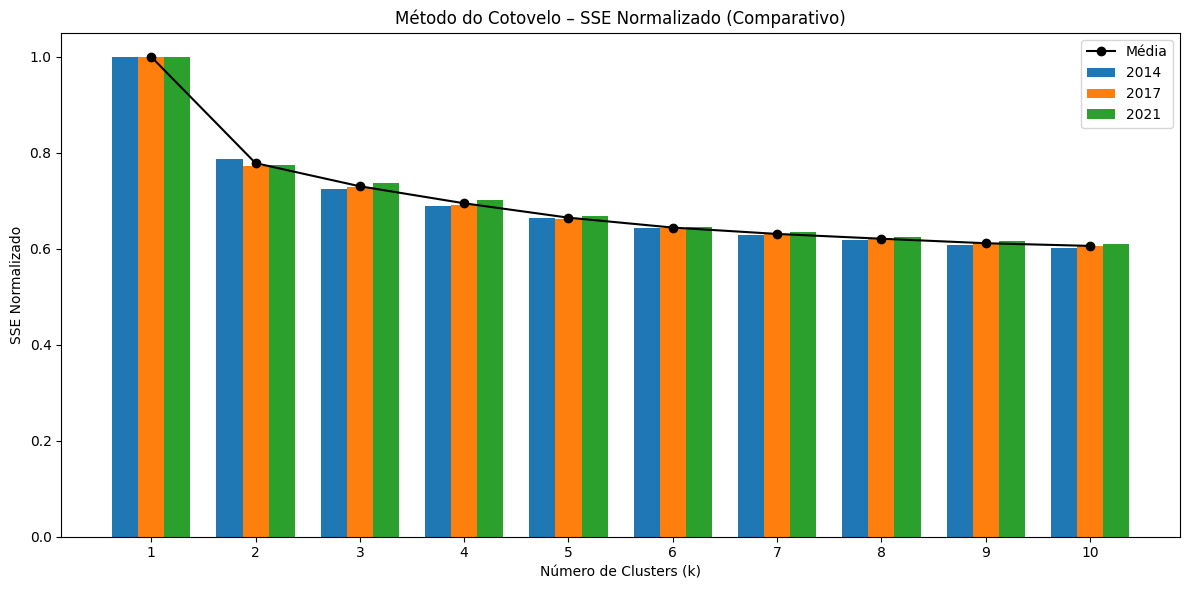

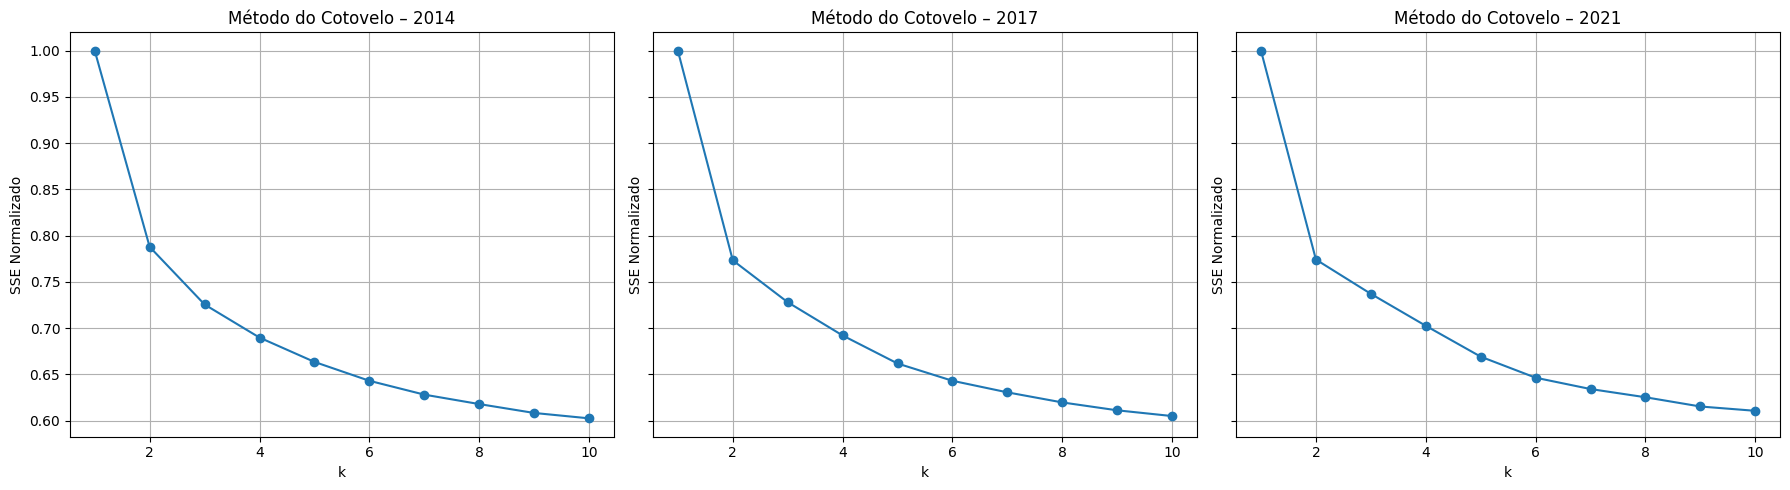

In [82]:
COLUNAS_PARA_CLUSTER = [
    'CO_TURNO_GRADUACAO', 'TP_SEXO', 'NU_IDADE', 'CO_CATEGAD',
    'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05',
    'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
    'QE_I12', 'QE_I13', 'QE_I15', 'QE_I17', 'QE_I21'
]
VARIAVEIS_NUMERICAS = ['NU_IDADE']

dfs_por_ano = {
    2014: dados_14,
    2017: dados_17,
    2021: dados_21
}

sse_resultados = {}
dataframes_processados = {}

for ano, df in dfs_por_ano.items():
    sse, df_cluster, df_completo = processar_ano(df, COLUNAS_PARA_CLUSTER, VARIAVEIS_NUMERICAS)
    sse_resultados[ano] = sse
    dataframes_processados[ano] = df_completo

plotar_cotovelo_comparativo(sse_resultados)
plotar_cotovelo_individual(sse_resultados)

A função de salvar pega os DF transformados (one-hot + normalização) e inclui a nota geral (NT_GER) também padronizada. Ela não vai ser passada para o treinamento e também não foi utilizada no cotovelo, vai ser apenas para análise.

In [100]:
def salvar_clusterizados(dfs_entrada, colunas, numericas, caminho='.', prefixo='df_cluster_'):
    for ano, df in dfs_entrada.items():
        df_prep = df.copy()
        coluna_nota = df_prep['NT_GER'] if 'NT_GER' in df_prep.columns else None
        df_cluster_raw = df_prep[colunas].dropna()

        # One-hot nas categóricas
        df_dummies = pd.get_dummies(
            df_cluster_raw[list(set(colunas) - set(numericas))],
            drop_first=True
        ).astype(int)

        # Normaliza as numéricas
        scaler = StandardScaler()
        df_numerico = pd.DataFrame(
            scaler.fit_transform(df_cluster_raw[numericas]),
            columns=numericas,
            index=df_cluster_raw.index
        )
        df_clusterizado = pd.concat([df_dummies, df_numerico], axis=1)
        if coluna_nota is not None:
            df_clusterizado['NT_GER'] = coluna_nota.loc[df_clusterizado.index]
        nome_arquivo = os.path.join(caminho, f'{prefixo}{ano}.csv')
        df_clusterizado.to_csv(nome_arquivo, index=False)

In [101]:
salvar_clusterizados(
    dfs_entrada=dfs_por_ano,
    colunas=COLUNAS_PARA_CLUSTER,
    numericas=VARIAVEIS_NUMERICAS,
    caminho='.',
    prefixo='df_cluster_'
)

In [102]:
teste = pd.read_csv('df_cluster_2014.csv')

In [103]:
teste.columns

Index(['CO_CATEGAD', 'CO_TURNO_GRADUACAO', 'QE_I01_Outro', 'QE_I01_Separado',
       'QE_I01_Solteiro', 'QE_I01_Viúvo', 'QE_I01_nan',
       'QE_I08_Até 1,5 Salário Mínimo', 'QE_I08_De 1,5 a 3 Salários Mínimos',
       'QE_I08_De 10 a 30 Salário Mínimos',
       'QE_I08_De 3 a 4,5 Salários Mínimos',
       'QE_I08_De 4,5 a 6 Salário Mínimos', 'QE_I08_De 6 a 10 Salário Mínimos',
       'QE_I08_nan', 'QE_I10_Trabalha eventualmente',
       'QE_I10_Trabalho 21h/39h semanais', 'QE_I10_Trabalho 40h +',
       'QE_I10_Trabalho até 20h semanais', 'QE_I10_nan',
       'QE_I05_Fundamental I', 'QE_I05_Fundamental II', 'QE_I05_Nenhuma',
       'QE_I05_Pós-graduação', 'QE_I05_Superior', 'QE_I05_nan',
       'QE_I09_Possui renda/Outros', 'QE_I09_Possui renda/Sustento',
       'QE_I09_Possui renda/principal', 'QE_I09_Sem renda/Outros',
       'QE_I09_nan', 'QE_I03_Brasileira naturalizada', 'QE_I03_Estrangeira',
       'QE_I03_nan', 'TP_SEXO_M', 'QE_I17_Privada', 'QE_I17_Pública',
       'QE_I17_nan'